In [9]:
import sys
sys.executable


'C:\\Users\\siddh\\anaconda3\\python.exe'

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


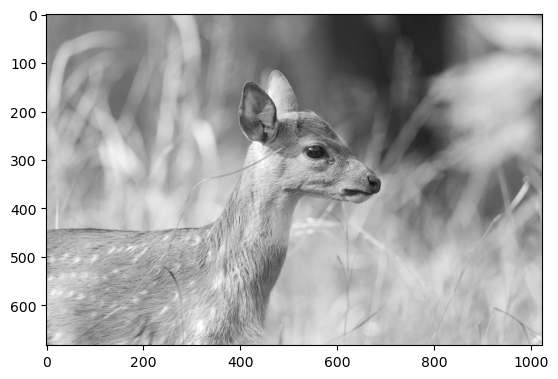

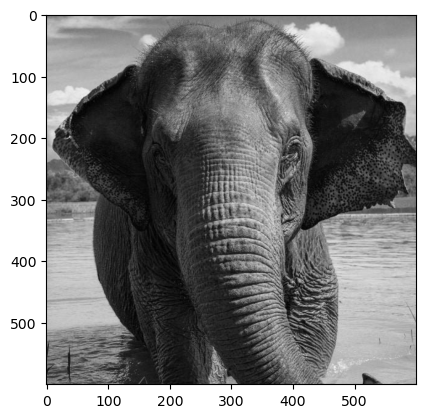

In [3]:
#Loading Dataset
DATADIR ="C:\\Users\\siddh\\Downloads\\Originals_CaTRAT\\Originals_CaTRAT\\New folder\\"
CATEGORIES = ["Deer", "Elephant"]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        # Read image using TensorFlow
      
        img_data = tf.io.read_file(img_path)
        
        #is used to decode the image data into a TensorFlow tensor
        img_tensor = tf.image.decode_image(img_data)

        # Display the image using matplotlib
        plt.imshow(img_tensor.numpy())
        plt.show()

        break  # Display only the first image in each category
    

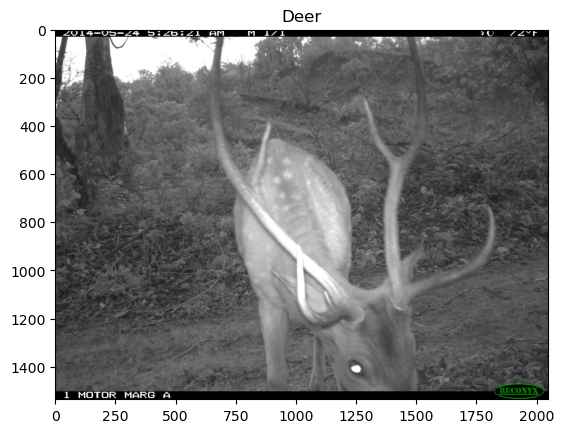

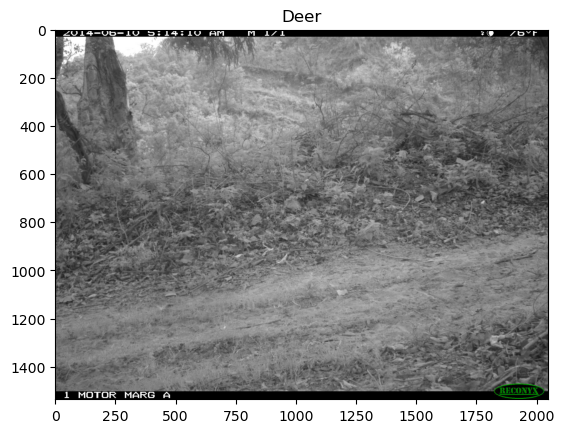

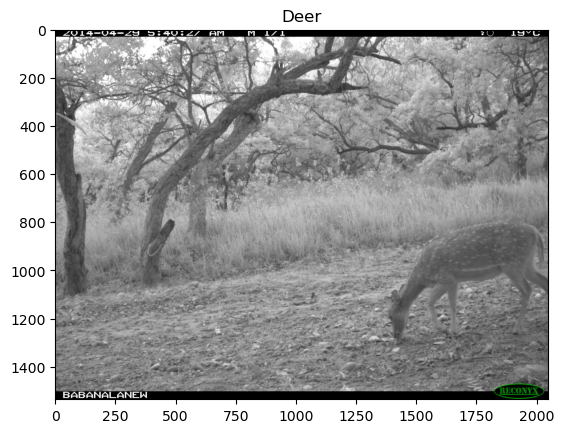

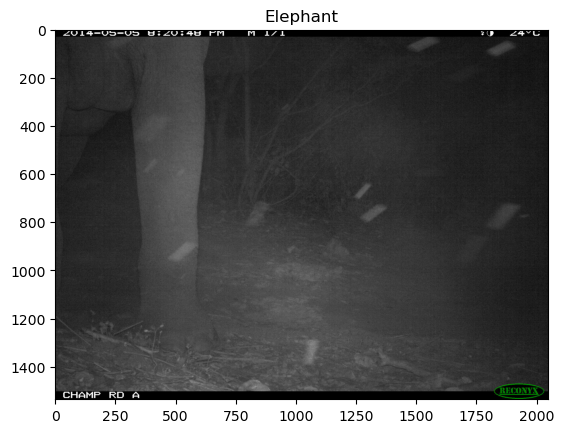

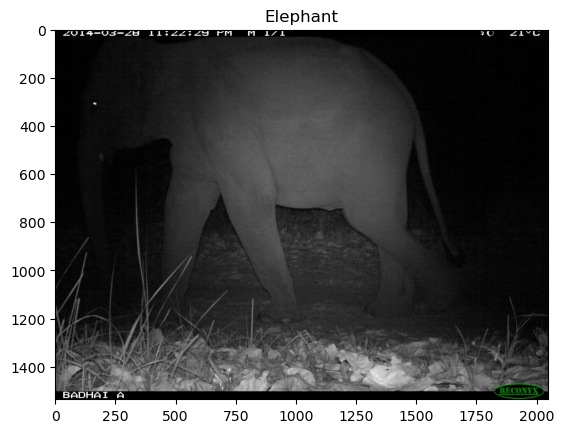

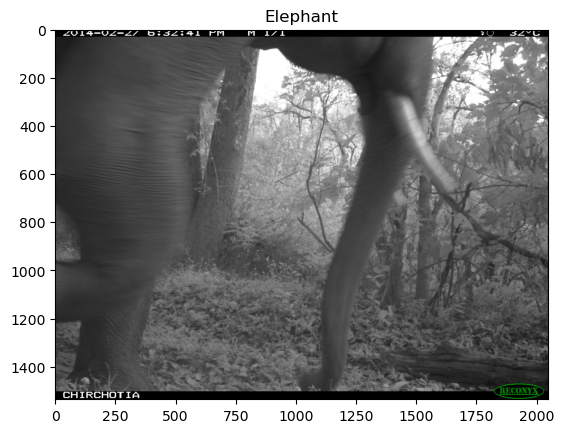

In [4]:
# Function to get a list of random images from a category
def get_random_images(category_path, num_images=3):
    image_names = os.listdir(category_path)
    random_images = random.sample(image_names, min(num_images, len(image_names)))
    return [os.path.join(category_path, img_name) for img_name in random_images]

# Display random images from each category
for category in CATEGORIES:
    category_path = os.path.join(DATADIR, category)
    random_image_paths = get_random_images(category_path)

    for img_path in random_image_paths:
        # Read image using TensorFlow
        img_data = tf.io.read_file(img_path)
        img_tensor = tf.image.decode_image(img_data)

        # Display the image using matplotlib
        plt.imshow(img_tensor.numpy())
        plt.title(category)
        plt.show()

Image Shape: (1536, 2048, 3)


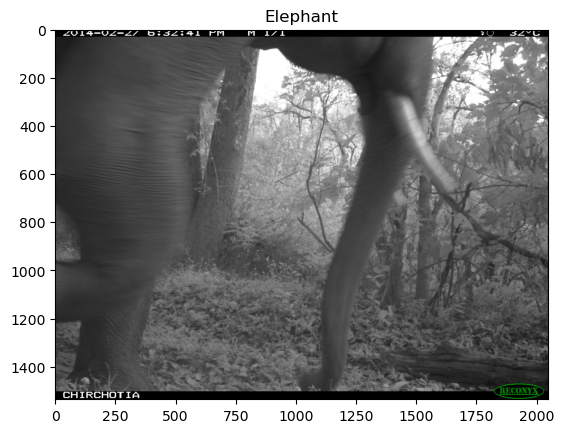

In [5]:
# Print the shape of the decoded image tensor
print("Image Shape:", img_tensor.shape)

# Display the image using matplotlib
plt.imshow(img_tensor.numpy())
plt.title(category)
plt.show()


In [6]:
#print any single image data
img_tensor[1,:]

<tf.Tensor: shape=(2048, 3), dtype=uint8, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)>

In [7]:
print(img_tensor.shape)


(1536, 2048, 3)


# Model implementation

In [10]:
from keras.optimizers import Adam

from keras import models, layers, optimizers




# Define the model
num_classes = 2
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  #reLU introduces non-linearity to the model(allowing learn complex patterns)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu')) #it challenging for the model to learn from the gradients during backpropagation(vanishes it)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',    #difference between the predicted output of the model and the true target values
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 255, 255, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 128)      

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Path to the main directory containing 'Deer' and 'Elephant' images
main_data_dir = 'C:\\Users\\siddh\\Downloads\\Originals_CaTRAT\\Originals_CaTRAT\\New folder\\'

# Set up data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=20,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

batch_size = 32

# Flow training images in batches using train_datagen generator
train_generator = datagen.flow_from_directory(
    main_data_dir,
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # This is the training set
    shuffle=True
)

# Flow validation images in batches using val_datagen generator
validation_generator = datagen.flow_from_directory(
    main_data_dir,
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # This is the validation set
    shuffle=False
)


# Setting up callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('CNN_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,  
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)




Found 1957 images belonging to 2 classes.
Found 489 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - ETA: 0s - loss: 1.3565 - accuracy: 0.6111
Epoch 1: val_accuracy improved from -inf to 0.47444, saving model to CNN_model.h5


C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - 352s 6s/step - loss: 1.3565 - accuracy: 0.6111 - val_loss: 0.8282 - val_accuracy: 0.4744
Epoch 2/30
62/62 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.6934
Epoch 2: val_accuracy improved from 0.47444 to 0.49284, saving model to CNN_model.h5
62/62 [==============================] - 312s 5s/step - loss: 0.6023 - accuracy: 0.6934 - val_loss: 0.7604 - val_accuracy: 0.4928
Epoch 3/30
62/62 [==============================] - ETA: 0s - loss: 0.6008 - accuracy: 0.7052
Epoch 3: val_accuracy did not improve from 0.49284
62/62 [==============================] - 352s 6s/step - loss: 0.6008 - accuracy: 0.7052 - val_loss: 0.8667 - val_accuracy: 0.4519
Epoch 4/30
62/62 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.7108
Epoch 4: val_accuracy did not improve from 0.49284
62/62 [==============================] - 383s 6s/step - loss: 0.5947 - accuracy: 0.7108 - val_loss: 0.7806 - val_accuracy: 0.4601
Epoch 5/30


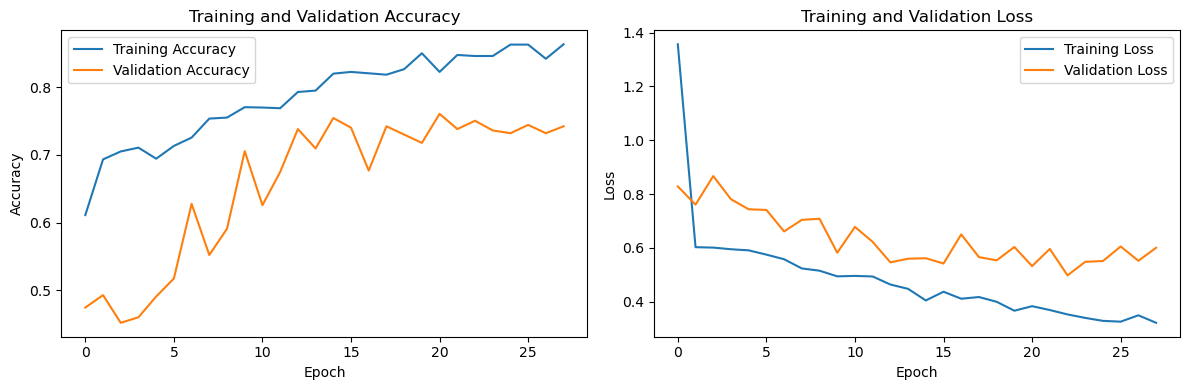

In [13]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend() #lines used

plt.tight_layout() #will prevent overlapping in graph(multiple subplots)
plt.show()

In [14]:

model.load_weights('CNN_model.h5')  # loading our model

# Evaluate the model on the validation data
eval_result = model.evaluate(validation_generator)

# Print the evaluation results
print("Validation Loss:", eval_result[0])
print("Validation Accuracy:", eval_result[1])


16/16 [==============================] - 45s 3s/step - loss: 0.5709 - accuracy: 0.7710
Validation Loss: 0.5709055066108704
Validation Accuracy: 0.7709611654281616


In [1]:
import os
import shutil
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('CNN_model.h5')  


# Path to the folder containing test images
test_images_dir = 'C:\\Users\\siddh\\Downloads\\Originals_CaTRAT\\Originals_CaTRAT\\Sorting images\\'

# Path to the folder where predicted images will be stored
predicted_images_dir = 'C:\\Users\\siddh\\Downloads\\Originals_CaTRAT\\Originals_CaTRAT\\Predicted images\\'


# Threshold for moving images (85% confidence)
confidence_threshold = 0.85

# Iterate through the test images
for filename in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, filename)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(512, 512))
    img_array = image.img_to_array(img)          #3D NumPy array representing the image with shape (512, 512, 3),
    img_array = np.expand_dims(img_array, axis=0) #match the expected input shape of a neural network
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array) #image array passed through model.predict [generate propbabilty scores of each particular class]
    class_index = np.argmax(predictions) #finds the index of the maximum value in the predictions array , class with the highest probability score.
    confidence = predictions[0][class_index]  #0 as probabilty of finding a Deer is higher( will hold the probability score for the class that the model believes the image belongs to.)

    # Check if confidence is above the threshold
    if confidence >= confidence_threshold:
        predicted_class = 'Deer' if class_index == 0 else 'Elephant'
        destination_folder = os.path.join(predicted_images_dir, predicted_class)

        # Move the image to the predicted class folder
        shutil.move(img_path, os.path.join(destination_folder, filename))
        print(f"Moved {filename} to {predicted_class} folder.")
    else:
        print(f"Confidence for {filename} is below threshold, keeping it in the Sorting images folder.")







1/1 [==============================] - 0s 264ms/step
Confidence for 3af63d96ba.jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 81ms/step
Confidence for 63e4606329.jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 69ms/step
Confidence for 77e5ea_bb20026e17d9440ab6fc3a985f7568e3~mv2 (1).jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 60ms/step
Confidence for 77e5ea_bb20026e17d9440ab6fc3a985f7568e3~mv2.jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 77ms/step
Confidence for 82ce24d8fa.jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 52ms/step
Confidence for CN7Q4525_web.jpg is below threshold, keeping it in the Sorting images folder.
1/1 [==============================] - 0s 77ms/step
Confidence for